In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from utils import *
from plotting import *

In [2]:
matchms_scores = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.01_1%I_all_peaks_with_0s.tsv", sep="\t")
matchms_scores = get_matching_rows(matchms_scores, 'query', 'reference')
matchms_scores = append_classes(matchms_scores, 'query')
merged = append_spectrum_metadata(matchms_scores)

2024-01-11 10:54:48,902:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-01-11 10:54:48,903:WARNING:matchms:add_retention:None can't be converted to float.
2024-01-11 10:54:48,904:WARNING:matchms:add_retention:None can't be converted to float.
2024-01-11 10:54:48,909:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-01-11 10:54:48,910:WARNING:matchms:add_retention:None can't be converted to float.
2024-01-11 10:54:48,910:WARNING:matchms:add_retention:None can't be converted to float.
2024-01-11 10:54:48,914:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-01-11 10:54:48,915:WARNING:matchms:add_retention:None can't be converted to float.
2024-01-11 10:54:48,917:WARNING:matchms:add_retention:None can't be converted to float.
2024-01-11 10:54:48,920:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2024-01-11 10:54:48,921:WARNING:matchms:add_retention:None can't be converted to float.
2024-01-11 10:54

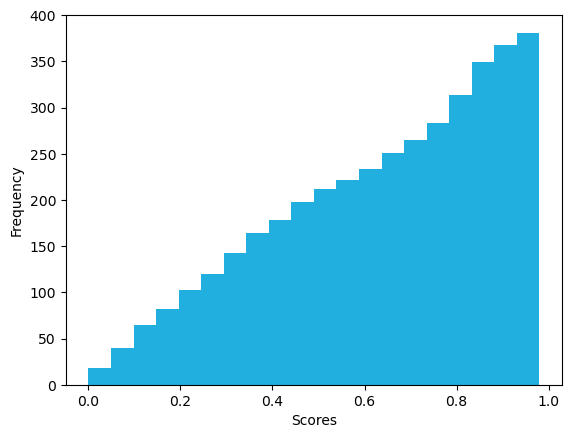

In [3]:
plt.hist(merged['CosineHungarian_0.01_0.0_1.0_scores'], bins=20,color='#20afdf', cumulative=True)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

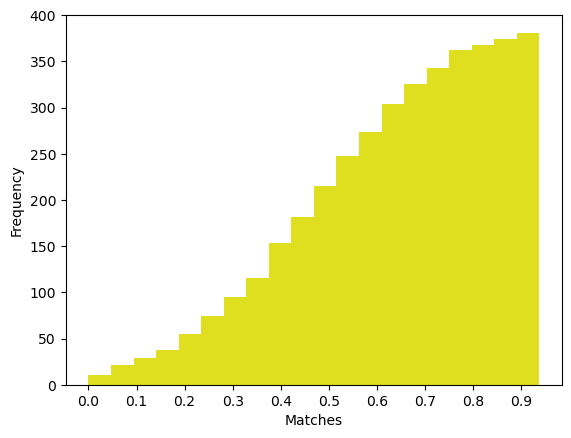

In [5]:
matches_normalized = merged['CosineHungarian_0.01_0.0_1.0_matches'] / merged['n_peaks_reference']
plt.hist(matches_normalized, bins=20,color='#dfdf20', cumulative=True)
plt.xticks(np.arange(0, 1, 0.1))
plt.xlabel('Matches')
plt.ylabel('Frequency')
plt.show()

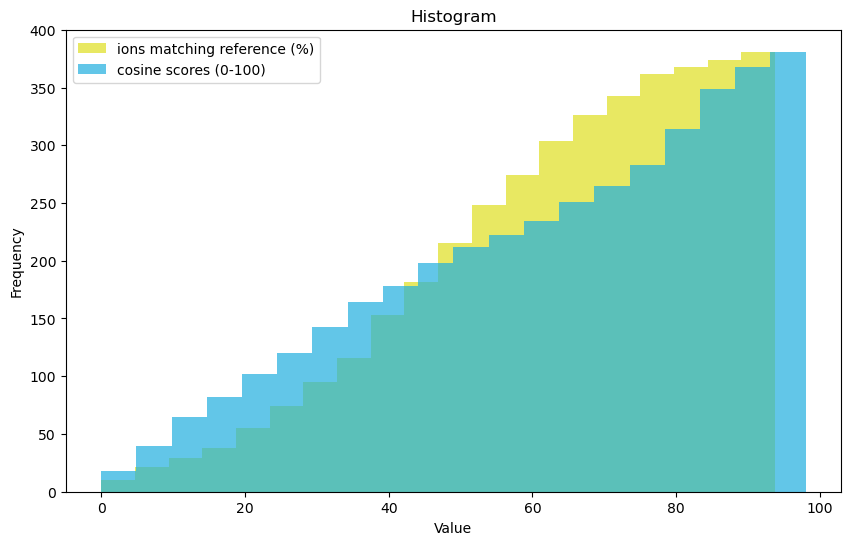

In [24]:
plt.figure(figsize=(10, 6))

# Plot histogram of matches
plt.hist(matches_normalized * 100, bins=20, color='#dfdf20', alpha=0.7, label='ions matching reference (%)', cumulative=True)

# Plot histogram of scores
plt.hist(merged['CosineHungarian_0.01_0.0_1.0_scores'] * 100, bins=20, color='#20afdf', alpha=0.7, label='cosine scores (0-100)', cumulative=True)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.legend()
plt.show()